In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
df=pd.read_csv("Downloads/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
df.isnull().sum()

Day            0
Outlook        0
Temprature     0
Humidity       0
Wind           0
Play_Tennis    0
dtype: int64

In [9]:
# Optional: to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [10]:
# 2. Inspect
print(df.head())
print(df.info())
print(df.describe())

  Day   Outlook Temprature Humidity    Wind Play_Tennis
0  D1     Sunny        Hot     High    Weak          No
1  D2     Sunny        Hot     High  Strong          No
2  D3  Overcast        Hot     High    Weak         Yes
3  D4      Rain       Mild     High    Weak         Yes
4  D5      Rain       Cool   Normal    Weak         Yes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day          14 non-null     object
 1   Outlook      14 non-null     object
 2   Temprature   14 non-null     object
 3   Humidity     14 non-null     object
 4   Wind         14 non-null     object
 5   Play_Tennis  14 non-null     object
dtypes: object(6)
memory usage: 804.0+ bytes
None
       Day Outlook Temprature Humidity  Wind Play_Tennis
count   14      14         14       14    14          14
unique  14       3          3        2     2           2
top     D1   

In [3]:
# 3. Preprocessing

# Drop ID column since it doesn’t help clustering
df_clean = df.drop(columns=['CustomerID'])

In [7]:
# Encode Gender (if you want to include gender)
df_clean['Gender'] = df_clean['Gender'].map({'Male': 0, 'Female': 1})

In [8]:
# Select features for clustering
# You might try different combinations. Common: Annual Income & Spending Score
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df_clean[features].values

In [9]:
# Optionally scale features (helps if scales differ a lot)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# 4. Determine optimal number of clusters — Elbow Method

wcss = []  # within-cluster sum of squares
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

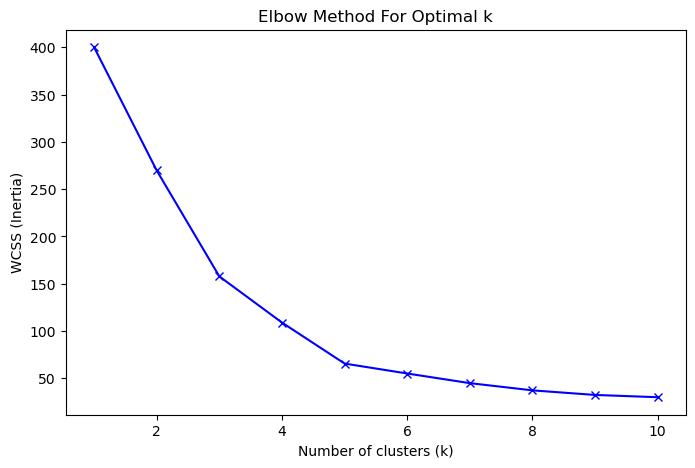

In [11]:
# Plot elbow
plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.show()

In [12]:
# 5. (Optional) Use Silhouette Score to help choose k

sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append((k, score))

print("Silhouette scores for different k:")
for k, score in sil_scores:
    print(f"k = {k}: {score:.3f}")

Silhouette scores for different k:
k = 2: 0.321
k = 3: 0.467
k = 4: 0.494
k = 5: 0.555
k = 6: 0.540
k = 7: 0.528
k = 8: 0.455
k = 9: 0.457
k = 10: 0.443


In [13]:
# 6. Fit KMeans with chosen k

chosen_k = 5  # For example, 5 is commonly used with this dataset
kmeans = KMeans(n_clusters=chosen_k, init='k-means++', random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels back to the original data
df['Cluster'] = cluster_labels

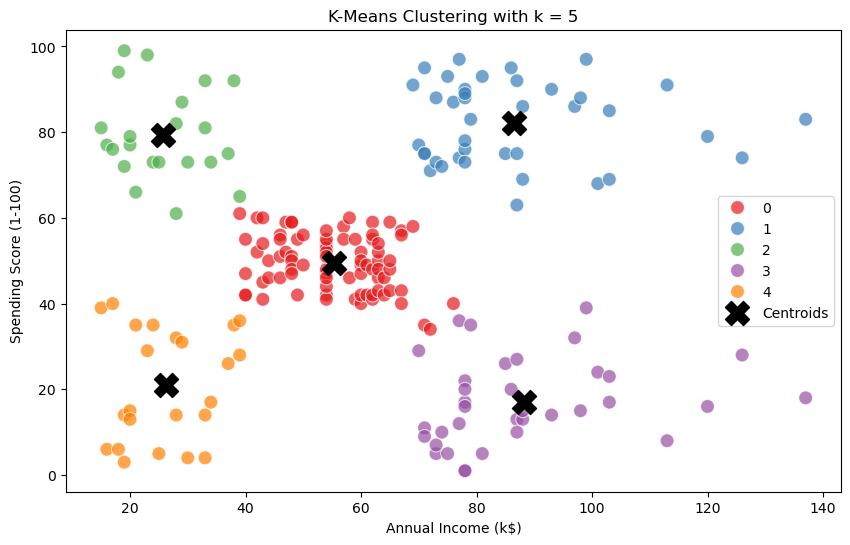

In [15]:
# 7. Visualize clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df['Annual Income (k$)'], 
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='Set1',
    s=100,
    alpha=0.7)

# Plot centroids (on scaled space: need to inverse transform for original space)
centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', marker='X', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title(f'K-Means Clustering with k = {chosen_k}')
plt.legend()
plt.show()

In [15]:
# 8. Interpretation

# for i in range(chosen_k):
  #  cluster_data = df[df['Cluster'] == i]
   # print(f"Cluster {i}")
#    print(cluster_data[features].describe())
 #   print('\n')

In [16]:
# Average values per cluster
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary)


         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


# Evaluation Metrics 

## Inertia (Within-Cluster Sum of Squares)

In [17]:
from sklearn.cluster import KMeans

# Assuming X_scaled is your standardized features
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Inertia
inertia = kmeans.inertia_
print("Inertia (Within-Cluster Sum of Squares):", inertia)


Inertia (Within-Cluster Sum of Squares): 65.56840815571681


## Dunn Index

## Other Metrics

In [19]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


# Assuming X_scaled is the standardized features and y_kmeans is cluster labels
sil_score = silhouette_score(X_scaled, y_kmeans)
db_score = davies_bouldin_score(X_scaled, y_kmeans)
ch_score = calinski_harabasz_score(X_scaled, y_kmeans)

print("Silhouette Score:", sil_score)
print("Davies-Bouldin Index:", db_score)
print("Calinski-Harabasz Index:", ch_score)


Silhouette Score: 0.5546571631111091
Davies-Bouldin Index: 0.5722356162263352
Calinski-Harabasz Index: 248.64932001536357
